In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


In [ ]:
rm -rf ~/.kaggle/*

In [ ]:
! mv /kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess --force

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 98% 418M/428M [00:02<00:00, 196MB/s]
100% 428M/428M [00:02<00:00, 184MB/s]


In [ ]:
! unzip -o toronto-emotional-speech-set-tess.zip

Streaming output truncated to the last 5000 lines.
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bar_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_base_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bath_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bean_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_beg_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bite_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_boat_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bone_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav  
  inflating: TESS Toronto emotional speech set data/OAF_angry/OAF_bought_angry.wav  
  inflating: TESS Toronto emotional 

In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [ ]:
paths=[]
labels=[]
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname, filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())
  if len(paths)==2800:
    break
print('Dataset is loaded')

Dataset is loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_jug_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_third_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_nag_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_haze_neutral.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_loaf_neutral.wav']

In [ ]:
labels[:5]

['neutral', 'neutral', 'neutral', 'neutral', 'neutral']

In [ ]:
df=pd.DataFrame()
df['Speech']=paths
df['label']=labels
df.head()

,Speech,label
0,/content/tess toronto emotional speech set dat...,neutral
1,/content/tess toronto emotional speech set dat...,neutral
2,/content/tess toronto emotional speech set dat...,neutral
3,/content/tess toronto emotional speech set dat...,neutral
4,/content/tess toronto emotional speech set dat...,neutral


In [ ]:
df['label'].value_counts()

label
neutral    400
happy      400
angry      400
disgust    400
fear       400
ps         400
sad        400
Name: count, dtype: int64

In [ ]:
df['label_count']=df['label'].value_counts()

In [ ]:
df.drop('label_count',axis=1)

,Speech,label
0,/content/tess toronto emotional speech set dat...,neutral
1,/content/tess toronto emotional speech set dat...,neutral
2,/content/tess toronto emotional speech set dat...,neutral
3,/content/tess toronto emotional speech set dat...,neutral
4,/content/tess toronto emotional speech set dat...,neutral
...,...,...
2795,/content/tess toronto emotional speech set dat...,sad
2796,/content/tess toronto emotional speech set dat...,sad
2797,/content/tess toronto emotional speech set dat...,sad
2798,/content/tess toronto emotional speech set dat...,sad


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

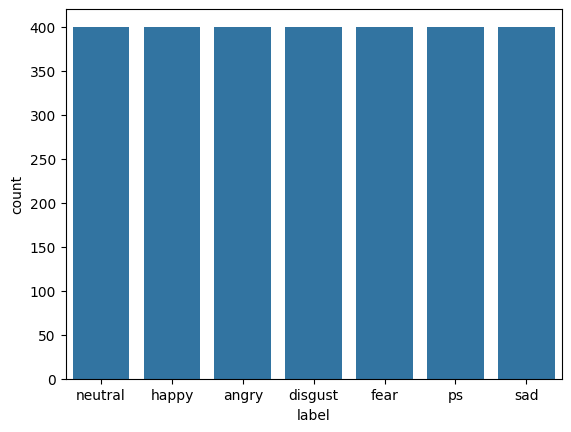

In [ ]:
sns.countplot(data=df,x='label')

In [ ]:
df

,Speech,label,label_count
0,/content/tess toronto emotional speech set dat...,neutral,NaN
1,/content/tess toronto emotional speech set dat...,neutral,NaN
2,/content/tess toronto emotional speech set dat...,neutral,NaN
3,/content/tess toronto emotional speech set dat...,neutral,NaN
4,/content/tess toronto emotional speech set dat...,neutral,NaN
...,...,...,...
2795,/content/tess toronto emotional speech set dat...,sad,NaN
2796,/content/tess toronto emotional speech set dat...,sad,NaN
2797,/content/tess toronto emotional speech set dat...,sad,NaN
2798,/content/tess toronto emotional speech set dat...,sad,NaN


In [ ]:
def waveplot(data,sr,emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion,size=20)
  librosa.display.waveshow(data,sr=sr)
  plt.show()

def spectogram(data,sr,emotion):
  x=librosa.stft(data)
  xdb=librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion,size=20)
  librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
  plt.colorbar()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


In [ ]:
df.drop('label_count',axis=1,inplace=True)

In [ ]:
print(df.head())
print(df['label'].unique())

                                              Speech    label
0  /content/tess toronto emotional speech set dat...  neutral
1  /content/tess toronto emotional speech set dat...  neutral
2  /content/tess toronto emotional speech set dat...  neutral
3  /content/tess toronto emotional speech set dat...  neutral
4  /content/tess toronto emotional speech set dat...  neutral
['neutral' 'happy' 'angry' 'disgust' 'fear' 'ps' 'sad']


In [ ]:
df['Speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_jug_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_third_neutral.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_neutral/OAF_nag_neutral.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_mode_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_said_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_Sad/OAF_book_sad.wav'],
      dtype=object)

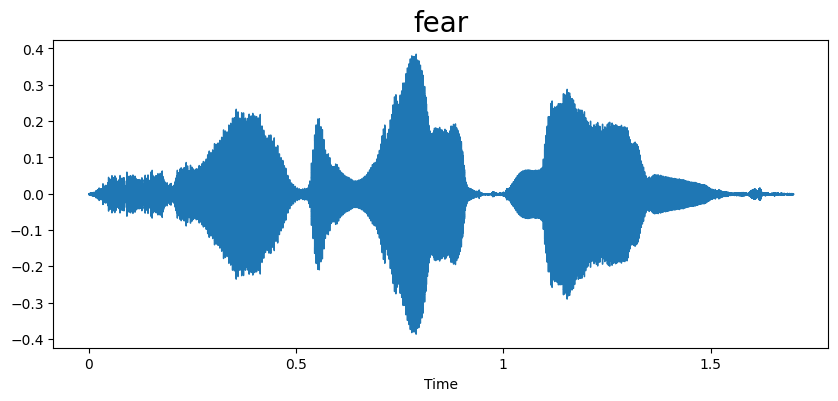

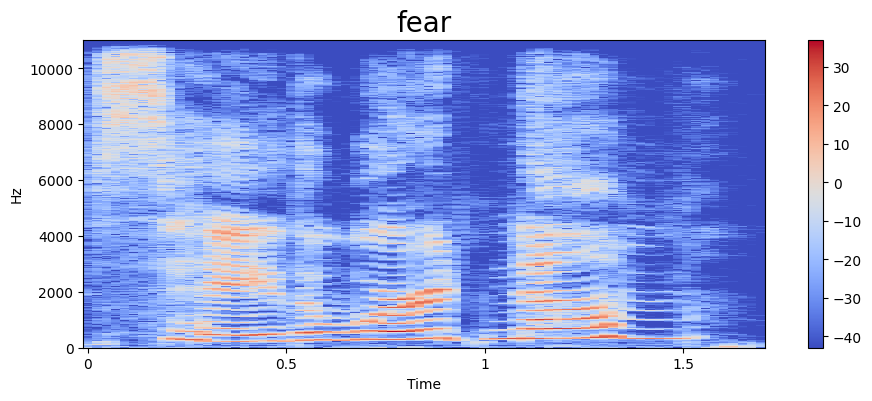

In [ ]:
emotion='fear'
path=np.array(df['Speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

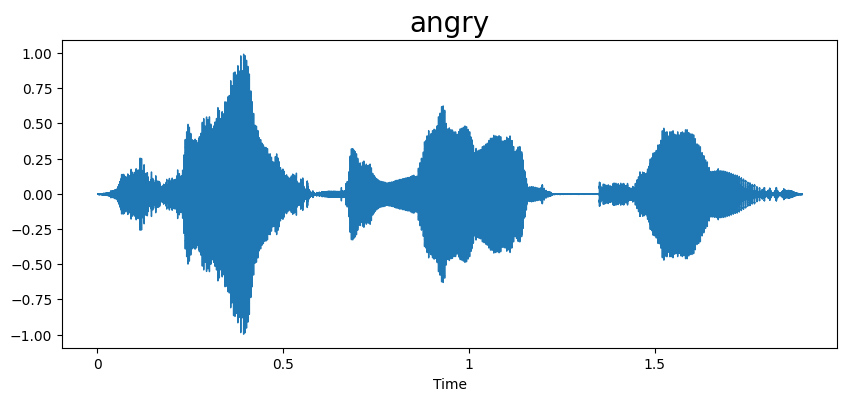

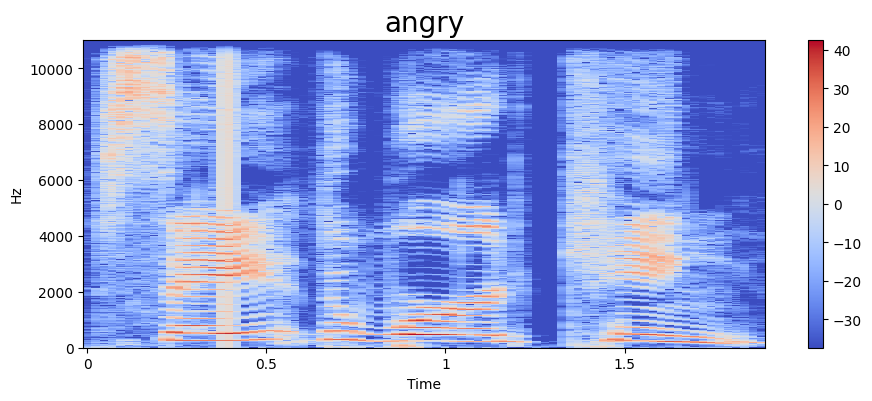

In [ ]:
emotion='angry'
path=np.array(df['Speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

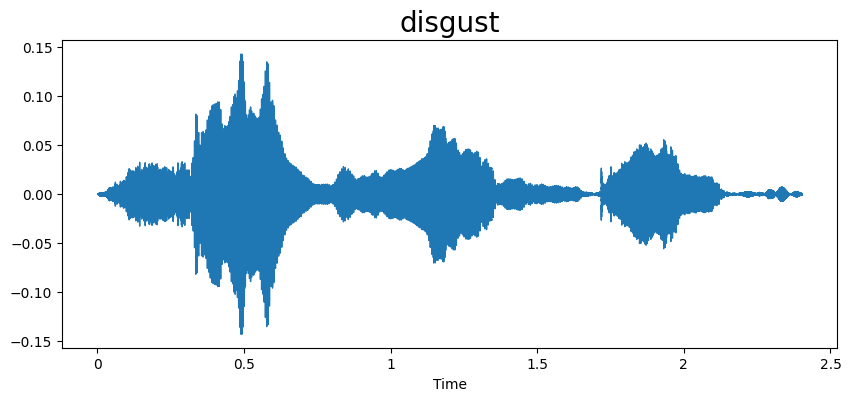

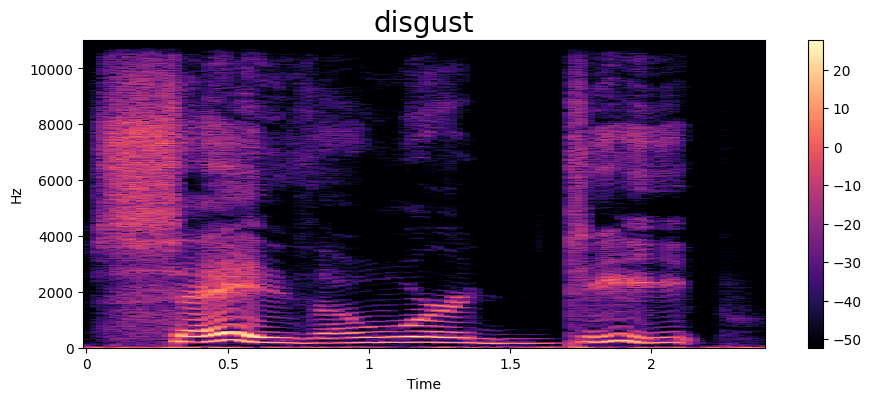

In [ ]:
emotion='disgust'
path=np.array(df['Speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

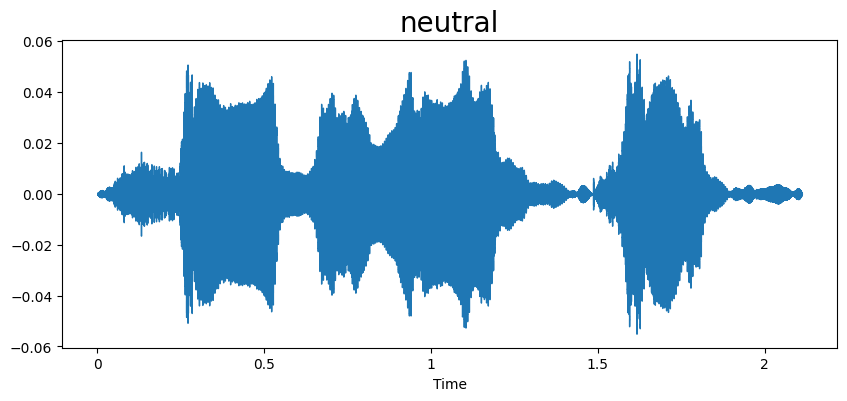

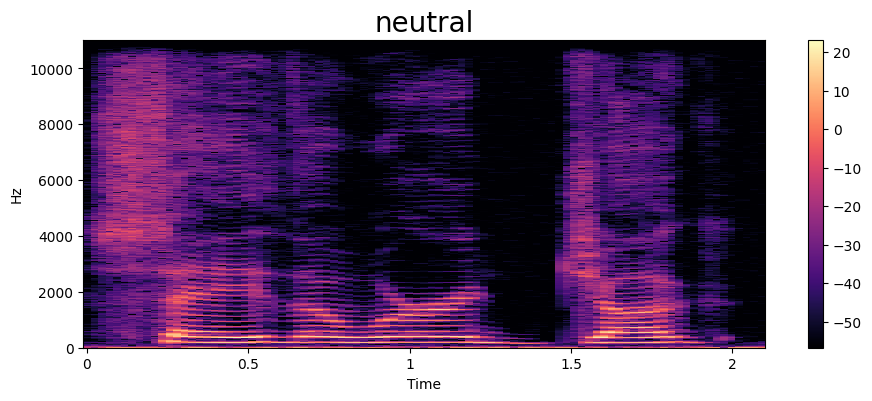

In [ ]:
emotion='neutral'
path=np.array(df['Speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

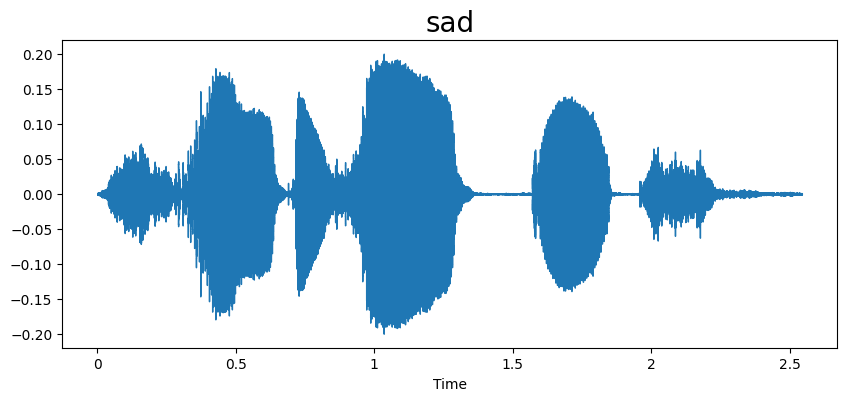

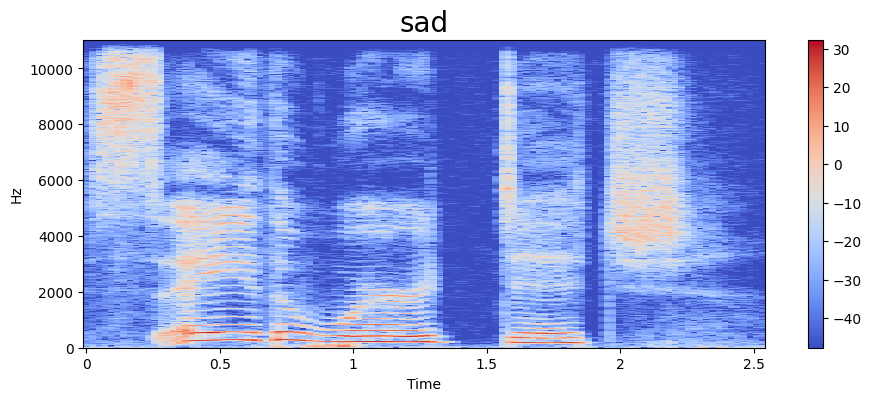

In [ ]:
emotion='sad'
path=np.array(df['Speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

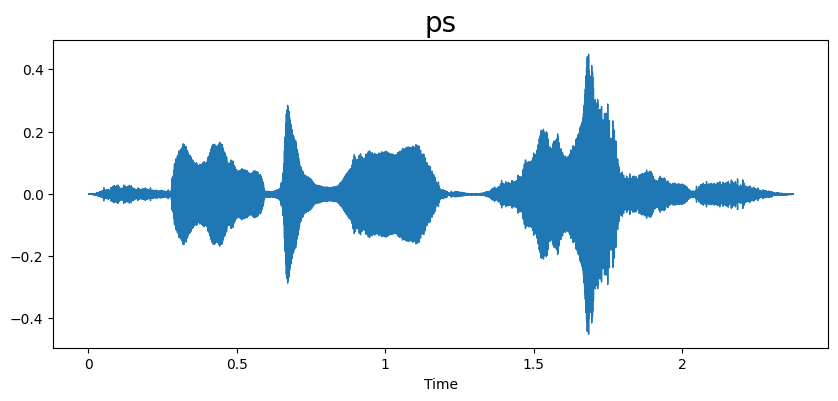

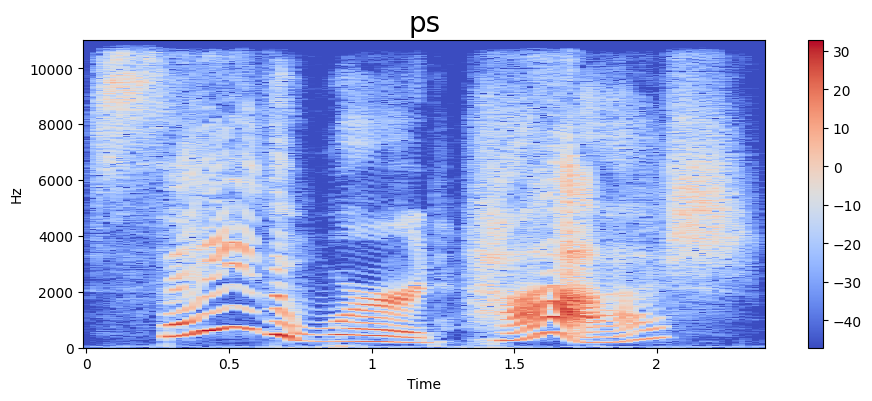

In [ ]:
emotion='ps'
path=np.array(df['Speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

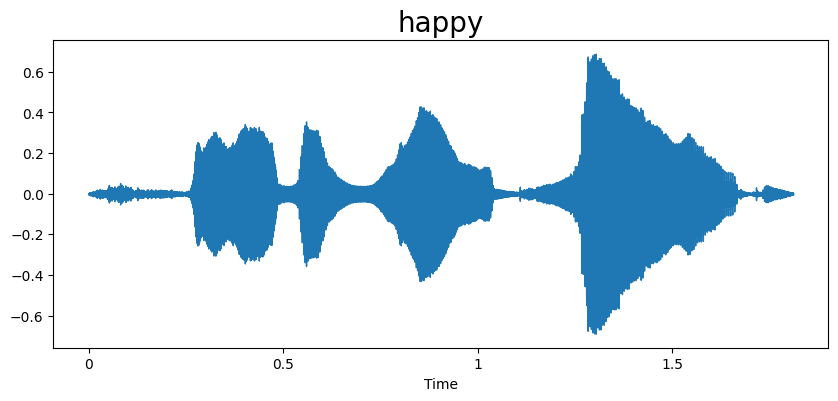

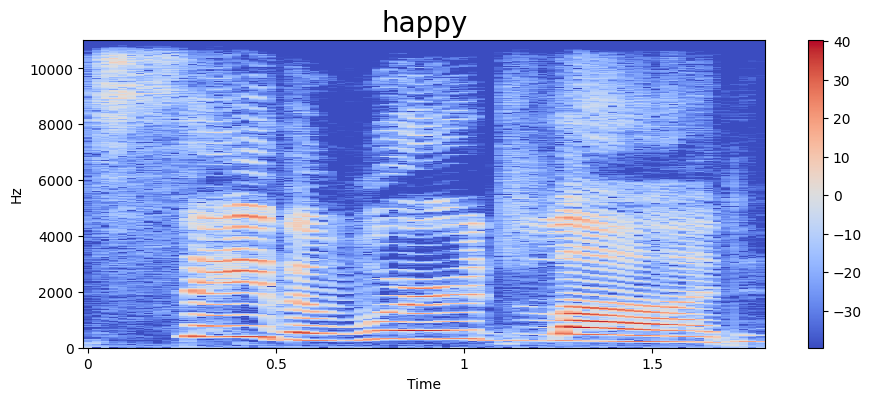

In [ ]:
emotion='happy'
path=np.array(df['Speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [ ]:
'''def extract_mfcc(filename):
  y,sr=librosa.load(filename,duration=3,offset=0.5)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40),axis=0)
  return mfcc'''

'def extract_mfcc(filename):\n  y,sr=librosa.load(filename,duration=3,offset=0.5)\n  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40),axis=0)\n  return mfcc'

In [ ]:
def extract_mfcc(filename):
  y, sr = librosa.load(filename, duration=3, offset=0.5)
  mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
  return mfcc

In [ ]:
extract_mfcc(df['Speech'][0])

array([-5.5611127e+02,  9.3259514e+01,  1.5261433e+01,  2.2807376e+00,
        1.8638296e+01,  1.5989403e+01, -2.9606347e+00, -7.1775637e+00,
       -1.2088565e+01, -2.3130696e+00, -4.2151408e+00,  2.9293449e+00,
       -5.4841328e+00, -4.8118919e-01,  6.1275182e+00,  5.0037465e+00,
       -3.4290466e+00,  5.7121558e+00, -1.8266250e+00,  2.0334148e+00,
        1.9561062e+00,  9.1564405e-01, -1.2190335e+00, -2.1506670e+00,
       -8.8588409e+00, -1.7040170e+00, -7.4398322e+00, -5.6584191e-01,
       -3.5882721e+00, -1.0842502e+00, -5.6229401e+00,  1.1631614e+00,
        1.3831373e+00,  1.1577791e+01,  2.2518158e+01,  2.6408909e+01,
        2.7780630e+01,  2.2078667e+01,  1.2268743e+01,  8.2031412e+00],
      dtype=float32)

In [ ]:
X_mfcc=df['Speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-556.11127, 93.259514, 15.261433, 2.2807376, ...
1       [-508.4802, 97.27162, 24.273657, -6.362437, 13...
2       [-509.31537, 109.53122, 18.30364, -3.6007202, ...
3       [-502.2553, 83.0864, 21.700191, 9.741715, 12.2...
4       [-526.3314, 92.38037, 25.583538, -4.1577783, 8...
                              ...                        
2795    [-523.5569, 118.091934, 39.993343, 6.9730954, ...
2796    [-529.30475, 109.1448, 28.02172, 9.923079, 20....
2797    [-525.7191, 126.25927, 45.980167, 9.714248, 14...
2798    [-518.7593, 81.717865, 27.169477, 10.063701, 1...
2799    [-559.8586, 101.99569, 33.756405, 12.112123, 2...
Name: Speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
X=np.expand_dims(X,-1)
print(X.shape)

(2800, 40, 1)


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])

In [ ]:
y=y.toarray()

In [ ]:
print(y.shape)

(2800, 7)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [ ]:
model = Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(7,activation='softmax'),
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
Model : "Sequential"

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 256)               264192    
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 7)                

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=30, batch_size=64)

Epoch 1/30
35/35 [==============================] - 7s 43ms/step - loss: 1.7450 - accuracy: 0.2768 - val_loss: 1.0939 - val_accuracy: 0.6375
Epoch 2/30
35/35 [==============================] - 0s 13ms/step - loss: 1.1509 - accuracy: 0.5344 - val_loss: 0.6218 - val_accuracy: 0.8304
Epoch 3/30
35/35 [==============================] - 0s 13ms/step - loss: 0.7586 - accuracy: 0.7170 - val_loss: 0.3997 - val_accuracy: 0.8982
Epoch 4/30
35/35 [==============================] - 1s 17ms/step - loss: 0.5444 - accuracy: 0.8223 - val_loss: 0.2181 - val_accuracy: 0.9375
Epoch 5/30
35/35 [==============================] - 1s 27ms/step - loss: 0.3994 - accuracy: 0.8879 - val_loss: 0.1222 - val_accuracy: 0.9661
Epoch 6/30
35/35 [==============================] - 1s 28ms/step - loss: 0.2786 - accuracy: 0.9187 - val_loss: 0.1173 - val_accuracy: 0.9661
Epoch 7/30
35/35 [==============================] - 1s 28ms/step - loss: 0.3397 - accuracy: 0.9031 - val_loss: 0.0924 - val_accuracy: 0.9750
Epoch 8/30
35

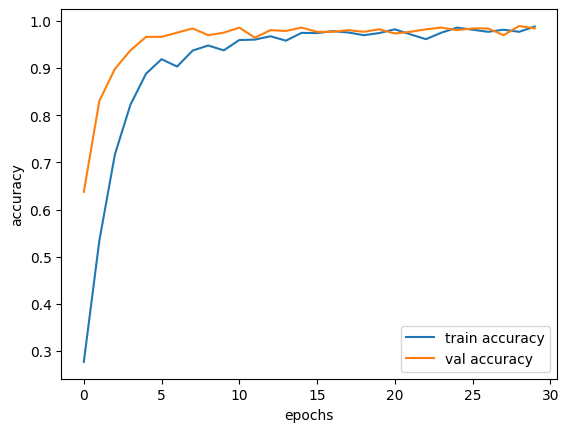

In [ ]:
epochs=list(range(30))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

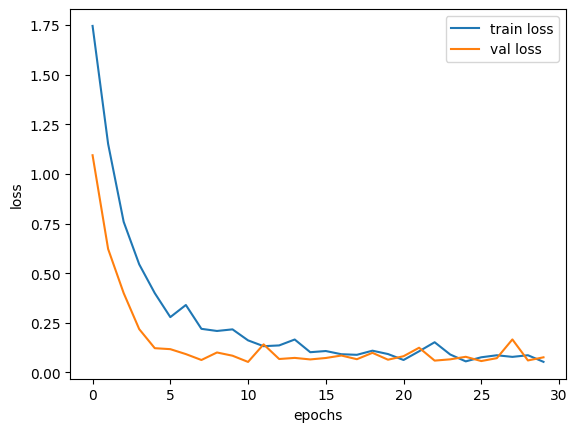

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred=model.predict(X_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_val_classes=np.argmax(y_val,axis=1)

18/18 [==============================] - 0s 4ms/step


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
conf_matrix=confusion_matrix(y_val_classes,y_pred_classes)

print('Confusion Matrix:')
print(conf_matrix)

Confusion Matrix:
[[89  0  0  1  0  2  0]
 [ 0 85  0  0  0  1  0]
 [ 0  0 89  1  0  0  0]
 [ 0  0  0 68  0  1  0]
 [ 0  0  0  0 77  0  0]
 [ 0  1  0  2  0 71  0]
 [ 0  0  0  0  0  0 72]]


In [ ]:
target_names=['angry','disgust','fear','happy','neutral','ps','sad']
print('classifucation report')
print(classification_report(y_val_classes,y_pred_classes,target_names=target_names))

classifucation report
              precision    recall  f1-score   support

       angry       1.00      0.97      0.98        92
     disgust       0.99      0.99      0.99        86
        fear       1.00      0.99      0.99        90
       happy       0.94      0.99      0.96        69
     neutral       1.00      1.00      1.00        77
          ps       0.95      0.96      0.95        74
         sad       1.00      1.00      1.00        72

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



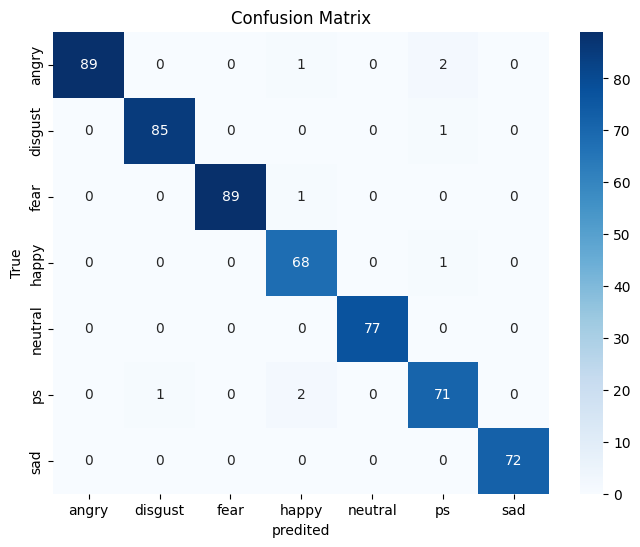

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=target_names,yticklabels=target_names)
plt.xlabel('predited')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()